# Import Library

In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt

# tensorflow
import tensorflow as tf
from tensorflow import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, Flatten, MaxPooling2D, Dense, Dropout, SpatialDropout2D
from tensorflow.keras.losses import sparse_categorical_crossentropy, binary_crossentropy
from tensorflow.keras.optimizers import Adam
import warnings
warnings.filterwarnings('ignore')

2023-05-30 15:13:45.289214: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-30 15:13:46.092458: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-05-30 15:13:46.092543: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-05-30 15:13:48.343267: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

# Configurasi Data

In [2]:
# Data configuration
train_path = 'Data/Train/'
test_path = 'Data/Test/'

# Preapare Dataset Untuk Training & Testing

In [3]:
# ImageDataGenerator
image_data = ImageDataGenerator(
    rescale=1./255, 
    shear_range=0.2, 
    zoom_range=0.2, 
    horizontal_flip=True,
    rotation_range=0.2,
)

# Training Data
train = image_data.flow_from_directory(
    train_path,
    color_mode="rgb",
    batch_size=32,
    target_size=(224, 224),
    shuffle=True,
    seed=None,
    interpolation="bilinear",
    class_mode='sparse'
)

# Test Data
test = image_data.flow_from_directory(
    test_path,
    color_mode="rgb",
    batch_size=32,
    target_size=(224, 224),
    shuffle=True,
    seed=None,
    interpolation="bilinear",
    class_mode='sparse'
)

Found 1600 images belonging to 4 classes.
Found 400 images belonging to 4 classes.


In [4]:
# Print the class encodings done by the generators
class_map = dict([(v, k) for k, v in train.class_indices.items()])
print(class_map)

{0: 'botol', 1: 'daunKering', 2: 'kaleng', 3: 'kertas'}


In [5]:
labels = (train.class_indices)
print(labels,'\n')

{'botol': 0, 'daunKering': 1, 'kaleng': 2, 'kertas': 3} 



# CNN Model

In [6]:
# Build a custom sequential CNN model
model = Sequential()

# Add Layers 1
model.add(Conv2D(filters=16, kernel_size=(3,3),
       strides=(2,2), padding='same',
       activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(pool_size=(2,2), strides=None, padding='same'))

# Add Layers 2
model.add(Conv2D(filters=32, kernel_size=(3,3),
       strides=(2,2), padding='same',
       activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=None, padding='same'))

# Add Layers 3
model.add(Conv2D(filters=64, kernel_size=(3,3),
       strides=(2,2), padding='same',
       activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=None, padding='same'))


# Flatten the feature map
model.add(Flatten())

# Add the fully connected layers
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))

2023-05-30 15:14:16.196768: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-05-30 15:14:16.197233: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-05-30 15:14:16.197270: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (LimitMax): /proc/driver/nvidia/version does not exist
2023-05-30 15:14:16.198315: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [7]:
# summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 112, 112, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 56, 56, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 64)          18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 64)         0

In [9]:
# Setup Callback dan Compile
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>0.87):
            print("\nAkurasi telah mencapai >87%!")
            self.model.stop_training = True
callbacks = myCallback()

# compile 
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

In [10]:
model.fit_generator(
    train,
    epochs=100, 
    verbose=1,
    steps_per_epoch = 1600//32,
    callbacks=[callbacks]
)

Epoch 1/100
50/50 [==============================] - 46s 864ms/step - loss: 1.5965 - accuracy: 0.3225
Epoch 2/100
50/50 [==============================] - 40s 800ms/step - loss: 1.2220 - accuracy: 0.4400
Epoch 3/100
50/50 [==============================] - 40s 804ms/step - loss: 1.0823 - accuracy: 0.5337
Epoch 4/100
50/50 [==============================] - 40s 790ms/step - loss: 1.0168 - accuracy: 0.5719
Epoch 5/100
50/50 [==============================] - 39s 786ms/step - loss: 0.9420 - accuracy: 0.6100
Epoch 6/100
50/50 [==============================] - 40s 792ms/step - loss: 0.9150 - accuracy: 0.6194
Epoch 7/100
50/50 [==============================] - 40s 794ms/step - loss: 0.8589 - accuracy: 0.6369
Epoch 8/100
50/50 [==============================] - 40s 793ms/step - loss: 0.8263 - accuracy: 0.6650
Epoch 9/100
50/50 [==============================] - 35s 694ms/step - loss: 0.7957 - accuracy: 0.6800
Epoch 10/100
50/50 [==============================] - 35s 690ms/step - loss: 0.742

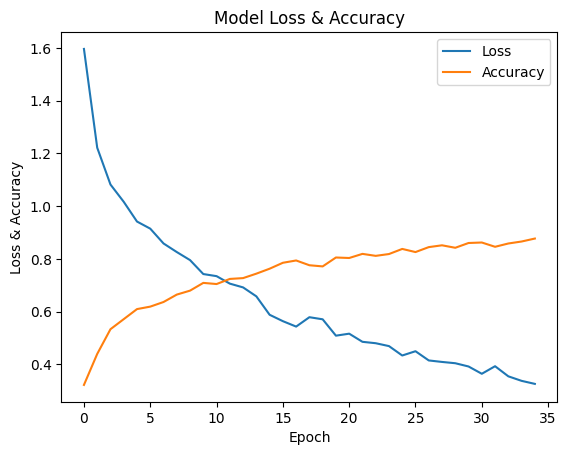

In [12]:
# plot loss and accuracy
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['accuracy'])
plt.title('Model Loss & Accuracy')
plt.ylabel('Loss & Accuracy')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Accuracy'], loc='upper right')
plt.show()

In [19]:
#cek persentase akurasi
test_loss, test_acc = model.evaluate(test, verbose=2)
print('\nTest accuracy:', test_acc)
print('Test loss:', test_loss)

13/13 - 11s - loss: 0.6366 - accuracy: 0.7725 - 11s/epoch - 840ms/step

Test accuracy: 0.7724999785423279
Test loss: 0.6365789175033569


In [14]:
import keras.utils as ku

1/1 [==============================] - 0s 32ms/step


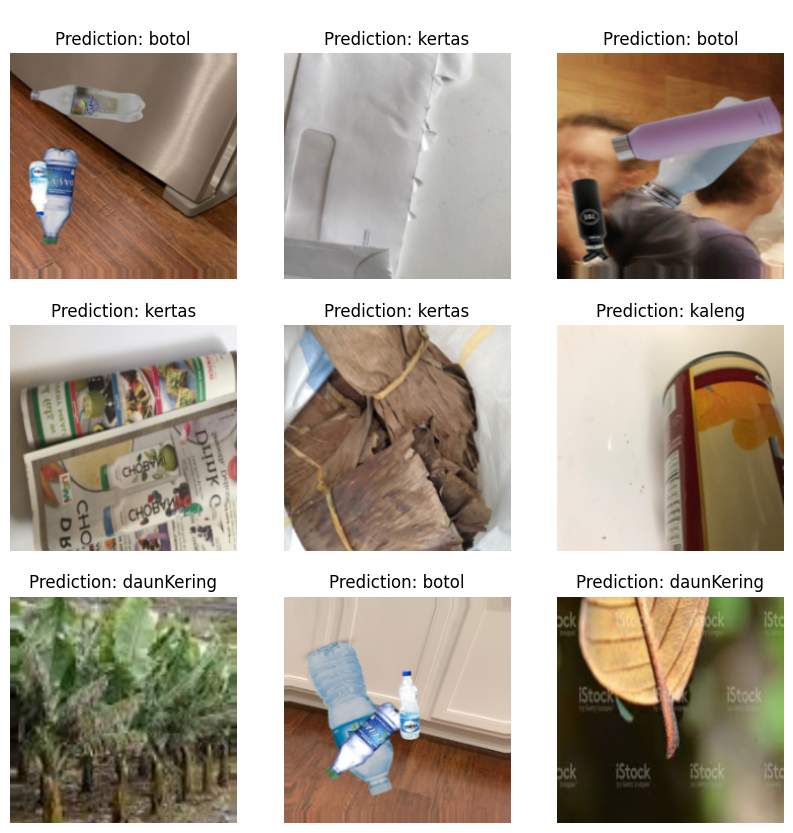

In [22]:
# tampilkan visualisasi 6 gambar prediksi dan actual dari model
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(test[i][0][0])
    plt.title(
              '\nPrediction: '+class_map[np.argmax(model.predict(test[i][0][0].reshape(1, 224, 224, 3)))])
    plt.axis('off')
plt.show()


# Save model ke h5

In [23]:
# save model
model.save('Sampahh.h5')